# Fig: Untangle++

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Setup

In [2]:
material_path = pjoin(tmp_dir, 'fig4_untangle_material')
pal_model, pal_cat = get_palette()
kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

## Load

In [3]:
raw = pjoin(material_path, 'r2_raw.npy')
raw = np.load(raw, allow_pickle=True).item()
raw = pd.DataFrame({
    'model': ['Raw'] * len(raw),
    'f': raw.keys(),
    'r2': raw.values(),
})

In [4]:
nvae = pjoin(material_path, 'r2_all_mods.npy')
nvae = np.load(nvae, allow_pickle=True).item()
nvae = nvae['NVAE']
nvae = pd.DataFrame({
    'model': ['NVAE'] * len(nvae),
    'f': nvae.keys(),
    'r2': nvae.values(),
})

In [5]:
df2p = pd.read_pickle(pjoin(material_path, 'df2p.df'))
df2p = df2p.drop(columns=['category', 'beta', 'nf'])
df2p = pd.concat([df2p, nvae, raw])
df2p = df2p.reset_index(drop=True)

In [6]:
df_avg = df2p.groupby(['model']).mean()
df_avg

,r2
model,
AE,0.476988
NVAE,0.639383
PCA,0.236002
Raw,0.234589
VAE,0.548413
cNAE,0.455975
cNVAE,0.897878


In [7]:
order = ['cNVAE', 'NVAE', 'VAE', 'cNAE', 'AE', 'PCA', 'Raw']

In [8]:
s = ''
for k in order:
    s += f"{k}: {df_avg['r2'][k]:0.3f}  "
print(s)

cNVAE: 0.898  NVAE: 0.639  VAE: 0.548  cNAE: 0.456  AE: 0.477  PCA: 0.236  Raw: 0.235

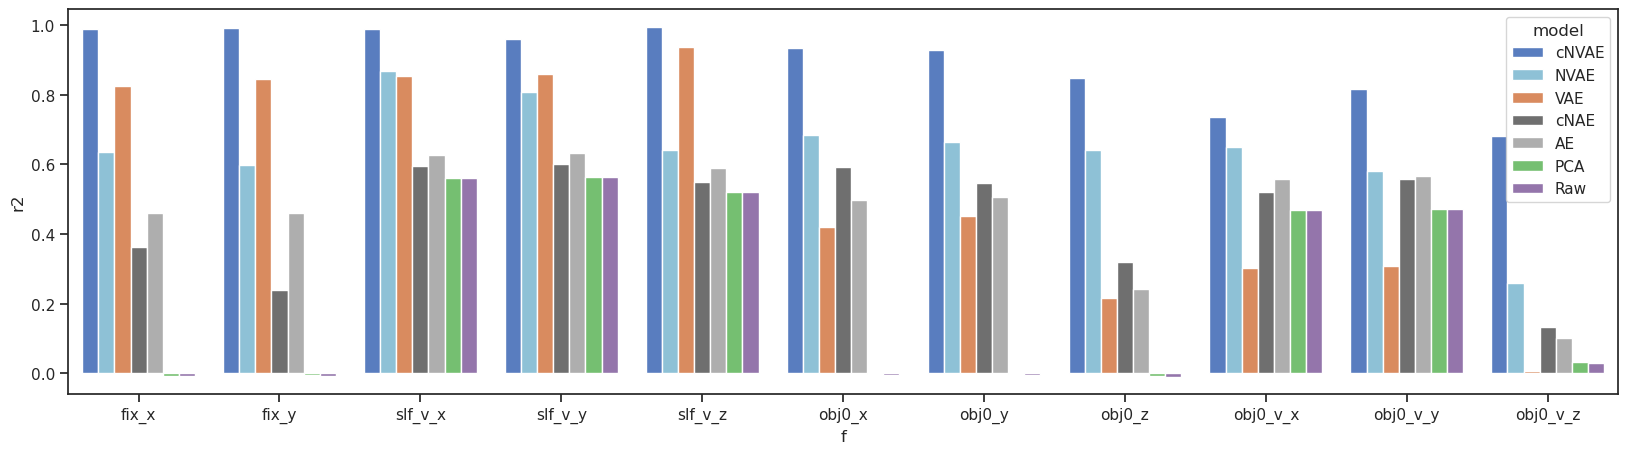

In [9]:
fig, ax = create_figure(1, 1, (20, 5))
sns.barplot(
    data=df2p,
    x='f',
    y='r2',
    hue='model',
    palette=pal_model,
    hue_order=['cNVAE', 'NVAE', 'VAE', 'cNAE', 'AE', 'PCA', 'Raw'],
    ax=ax,
);

## Finalize the figure

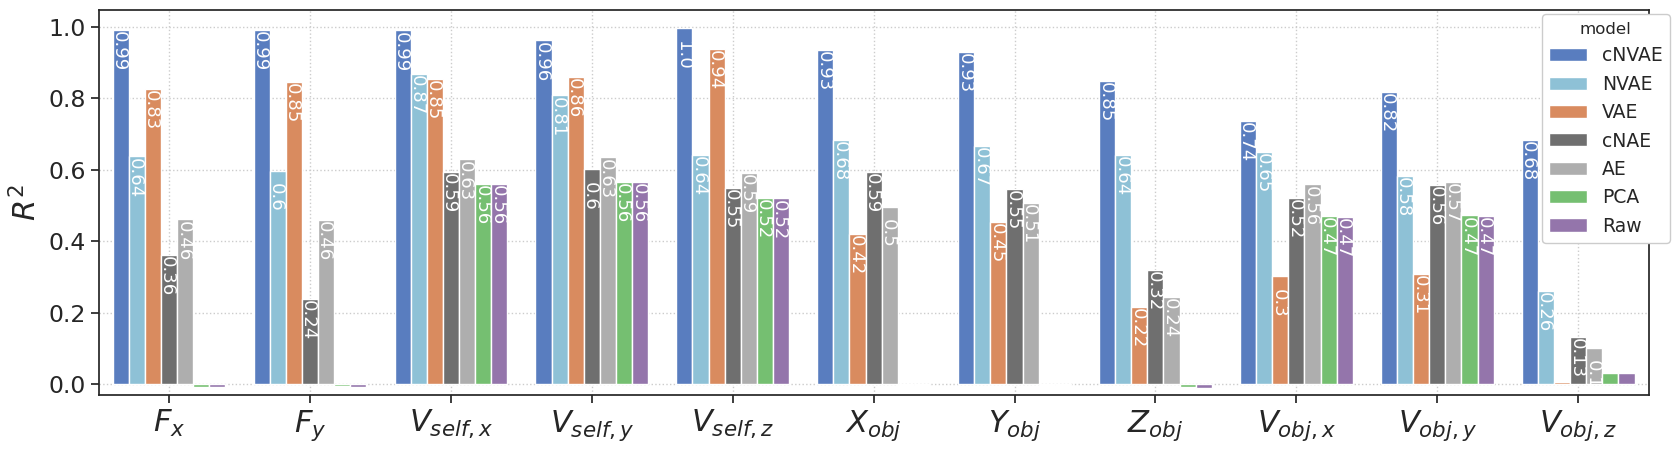

In [10]:
fig, ax = create_figure(1, 1, (20, 5))
bp = sns.barplot(
    data=df2p,
    x='f',
    y='r2',
    hue='model',
    hue_order=order,
    palette=pal_model,
    dodge=True,
    width=0.8,
    # width=0.795,
    ax=ax,
)
barplot_add_vals(
    bp,
    frac_x=0.385,
    frac_y=0.10,
    fontsize=13.0,
    rotation=-90,
    ha='center',
    color='w',
    decimals=2,
)
ax.set_ylim(bottom=-0.03)
ax.set_ylabel(r'$R^2$', fontsize=22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=17)
ax.set_xticklabels(LBL2TEX.values())
ax.set_xlabel('')
ax.grid()

sns.move_legend(ax, loc='best', fontsize=13.5)
leg = ax.get_legend()
leg.get_frame().set_alpha(1.0)
leg.set_bbox_to_anchor((0.925, 0.37))

fig.savefig(pjoin(fig_base_dir, 'untangle.pdf'), **kws_fig)

## Additional baseline: raw data

In [14]:
pal_model, pal_cat = get_palette()

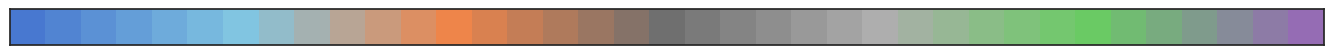

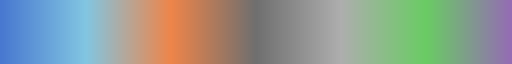

In [15]:
make_cmap(list(pal_model.values()))

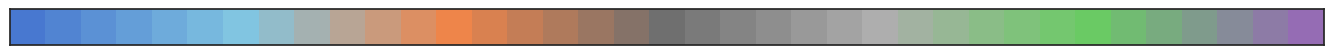

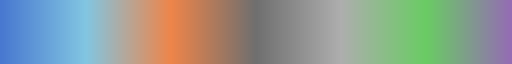

In [66]:
make_cmap(list(pal_model.values()))

In [6]:
xx = sns.color_palette('muted')
xx

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [5]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [ ]:
fig, _ = plot_bar_untangle(df2p, pal_model)

In [ ]:
fig.savefig(pjoin(fig_base_dir, 'untangle_full.pdf'), **kws_fig)